In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(333)
print(tf.__version__)
# load_data()  -> 4개의 numpy 배열 반환
fasion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

2.1.0


In [2]:
# train - 60,000개의 이미지, 0-9사이의 labels
# test - 10,000개의 이미지
print("train : ", train_images.shape, len(train_labels))
print("test : ", test_images.shape, len(test_labels))


train :  (60000, 28, 28) 60000
test :  (10000, 28, 28) 10000


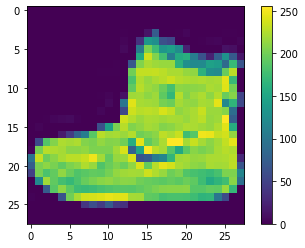

In [3]:
# Data size -> 0 ~ 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


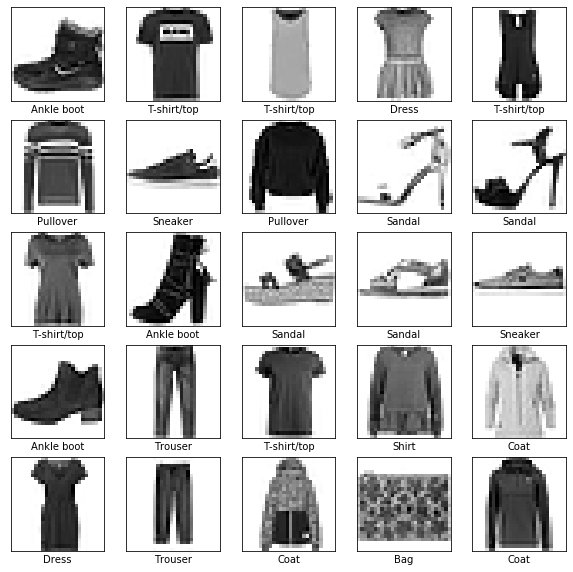

In [4]:
# Data processing
train_images = train_images / 255.0
test_images = test_images / 255.0

# cmap -> 데이터 수치를 색으로 변경.
# figsize -> size 지정
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [5]:
# Sequnetial 모델은 계층을 선형으로 쌓은 것.
# Flatten() -> 28 x 28 pixel 이미지를 1차원 배열로 변환.(28x28=784)
# Dense layer -> 밀집 연결 (densely-connected)층
# 1층 -> 128개의 노드, 2번째 층 -> 10개 노드의 softmax
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

# 손실 함수, optimizer, metrics(훈련 단계와 테스트 단계 모니터링)
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


In [6]:
# 신경망 모델을 훈련하는 단계는 다음과 같습니다:

# 훈련 데이터를 모델에 주입합니다.
# 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.(train_images, train_labels)
# 테스트 세트에 대한 모델의 예측을 만듭니다-(test_images,test_labels)
model.fit(train_images, train_labels, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4891 - accuracy: 0.8288
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3668 - accuracy: 0.8683
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3325 - accuracy: 0.8797
Epoch 4/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3097 - accuracy: 0.8863
Epoch 5/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2916 - accuracy: 0.8916


In [7]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy : ", test_acc)

# train set acc -> 0.8916, test set acc -> 0.8764 이유 : overfitting

10000/10000 - 0s - loss: 0.3455 - accuracy: 0.8764
Test Accuracy :  0.8764


In [8]:
# 예측 만들기
# 10가지 옷 품목에 상응하는 모델의 신뢰도를 나타냄.
predictions = model.predict(test_images)
np.argmax(predictions[0])



9

In [9]:
# test_images 와 예측한 값 비교
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")



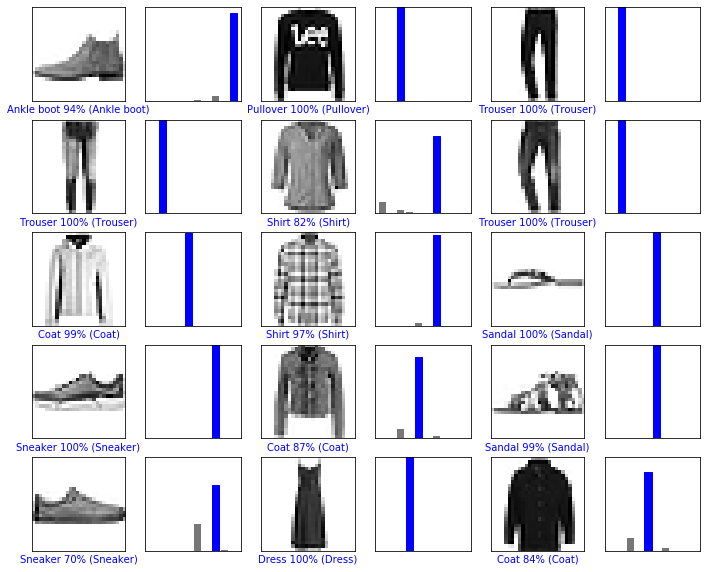

In [10]:
# 파란색 -> 올바른 예측
# 빨간색 -> 잘못 예측
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

